# The Boston Housing Data Project

In this notebook I will work on the Boston Housing Dataset project, It's a famous regression project. The goal is to predict the price of the house base on the following features:

#### CRIM: Per capita crime rate by town

#### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

#### INDUS: Proportion of non-retail business acres per town

#### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

#### NOX: Nitric oxide concentration (parts per 10 million)

#### RM: Average number of rooms per dwelling

#### AGE: Proportion of owner-occupied units built prior to 1940

#### DIS: Weighted distances to five Boston employment centers

#### RAD: Index of accessibility to radial highways

#### TAX: Full-value property tax rate per $10,000

#### PTRATIO: Pupil-teacher ratio by town

#### B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

#### LSTAT: Percentage of lower status of the population

The Output is:

#### MEDV: Median value of owner-occupied homes in $1000s

In [1]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

In [7]:
from pandas import read_csv, set_option
dataframe = read_csv(filename, names = names)

Let's look at the data first to try to understand it better.

In [8]:
peek = dataframe.head(20)
shape = dataframe.shape
types = dataframe.dtypes

In [9]:
print(peek)

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [10]:
print(shape)

(506, 14)


In [11]:
print(types)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


Let's perform some descriptive statistics

In [13]:
set_option('display.width',100)
set_option('precision',3)
description = dataframe.describe()
print(description)


          CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS      RAD      TAX  \
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000   
mean     3.614   11.364   11.137    0.069    0.555    6.285   68.575    3.795    9.549  408.237   
std      8.602   23.322    6.860    0.254    0.116    0.703   28.149    2.106    8.707  168.537   
min      0.006    0.000    0.460    0.000    0.385    3.561    2.900    1.130    1.000  187.000   
25%      0.082    0.000    5.190    0.000    0.449    5.886   45.025    2.100    4.000  279.000   
50%      0.257    0.000    9.690    0.000    0.538    6.208   77.500    3.207    5.000  330.000   
75%      3.677   12.500   18.100    0.000    0.624    6.623   94.075    5.188   24.000  666.000   
max     88.976  100.000   27.740    1.000    0.871    8.780  100.000   12.127   24.000  711.000   

       PTRATIO        B    LSTAT     MEDV  
count  506.000  506.000  506.000  506.000  
mean    18.456  356.

There are some noticable differences in means and standard deviations, we might need to perform some feature engineering to standardize the features, we will see how the algorithms perform.

Let's look at the correlations between the features to see if there is any corelation between two specific features. The purpose is to spot any dependences.

In [14]:
correlations = dataframe.corr(method='pearson')
print(correlations)

          CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  PTRATIO      B  \
CRIM     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583    0.290 -0.385   
ZN      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   -0.392  0.176   
INDUS    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721    0.383 -0.357   
CHAS    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   -0.122  0.049   
NOX      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668    0.189 -0.380   
RM      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   -0.356  0.128   
AGE      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506    0.262 -0.274   
DIS     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   -0.232  0.292   
RAD      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910    0.465 -0.444   
TAX      0.583 -0.315  0.721 -

Let's look at the histogrammes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7F92E8>,
      dtype=object)

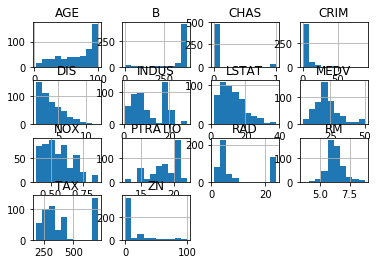

In [17]:
from matplotlib import pyplot

#histogrammes
dataframe.hist()


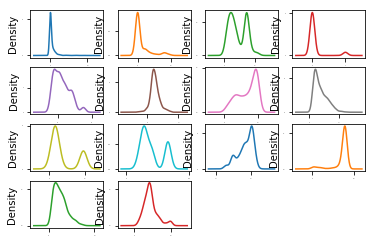

In [18]:
# density
dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()

## The machine learning part

Now that we have an understanding of the data, we are ready to start the machine learning part

In [19]:
array = dataframe.values
X = array[:,:-1]
Y = array[:,-1]

Let's split the data into training set and validation set

In [21]:
from sklearn.model_selection import train_test_split

validation_size = 0.2
seed= 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

Let's import the libraries containing the regression algorithms we are going to try

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

We define the list of algorithms to try:

In [29]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma = 'auto')))

And then we evaluate every model using cross validation score with 10 folds

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [31]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} {cv_results.std()}')

LR: -21.379855726678684 9.414263656984737
LASSO: -26.423561108409654 11.651109915777916
EN: -27.50225935066171 12.305022264112704
KNN: -41.89648839024391 13.901688149849864
CART: -28.935953048780487 14.668945736956521
SVR: -85.51834183929131 31.99479823184288


With the negative mean squared error, the larger the better. In this we can see that the logistic regression performs the best, but the SVR algorithm performs surprisingly bad, I will try the apply standard scaling to the features to improve the performance. 

In order to do that we will use pipelines and use the standard scaler.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} {cv_results.std()}')

ScaledLR: -21.379855726678564 9.414263656984705
ScaledLASSO: -26.607313557676616 8.978761485890264
ScaledEN: -27.932372158135518 10.587490490139404
ScaledKNN: -20.107620487804876 12.376949150820472
ScaledCART: -24.393234146341463 12.048647863842886
ScaledSVR: -29.633085500303213 17.009186052351556


Now we can see that the K- neighbors regression algorithm performs best.

Now that we know wich algorithm performs best, let's do some tuning to increase the performance. The parameter we will tune is the K-value.

We will use the Grid search method to go over different K-values a measure the performance for each K-value

In [39]:
from sklearn.model_selection import GridSearchCV
import numpy

In [41]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=True)
grid_result = grid.fit(rescaledX, Y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: -18.172136963696367 using {'n_neighbors': 3}
-20.208663366336634 (15.029651571426534) with: {'n_neighbors': 1}
-18.172136963696367 (12.950569939457809) with: {'n_neighbors': 3}
-20.131163366336633 (12.203696929311104) with: {'n_neighbors': 5}
-20.575845120226305 (12.345886317622917) with: {'n_neighbors': 7}
-20.368263659699302 (11.621737918716054) with: {'n_neighbors': 9}
-21.009204238605676 (11.610012219014179) with: {'n_neighbors': 11}
-21.15180854180092 (11.943317892509251) with: {'n_neighbors': 13}
-21.557399669966998 (11.536338523667055) with: {'n_neighbors': 15}
-22.789938161636233 (11.56686063504654) with: {'n_neighbors': 17}
-23.871872960149197 (11.340388662548046) with: {'n_neighbors': 19}
-24.361362115803416 (11.9147857079963) with: {'n_neighbors': 21}


K = 3 is the value for the best performace

Before we draw any conclusions, let's try ensemble algorithm just to make sure that no other algorithm performs better the the K-neighbors algorithm with K=3

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

In [45]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators = 100))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators = 100))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} {cv_results.std()}')

ScaledAB: -15.458624869451217 6.978344360431121
ScaledGBM: -9.938433501047902 4.400328248950901
ScaledRF: -11.917091302804879 6.312043168978922
ScaledET: -9.535373292012187 5.44613925119493


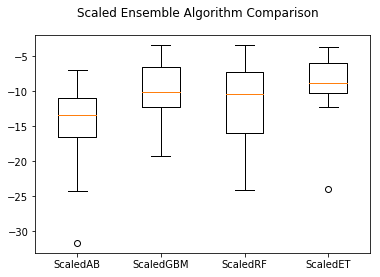

In [46]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

As we can see, the extra trees regressor performs the best

Let's tune the extra tree regressor by trying different n_estimators

In [49]:
# Tune scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=True)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: -8.885761 using {'n_estimators': 200}
-9.879671504950496 (5.6380102048001755) with: {'n_estimators': 50}
-9.236996381188112 (5.371409229573578) with: {'n_estimators': 100}
-8.938405297029696 (5.250832865235314) with: {'n_estimators': 150}
-8.88576059467822 (5.2328474309285795) with: {'n_estimators': 200}
-8.933976915643571 (5.227713849313458) with: {'n_estimators': 250}
-8.945263369912004 (5.218185535092529) with: {'n_estimators': 300}
-8.969455065871916 (5.223057678421461) with: {'n_estimators': 350}
-9.001128872524781 (5.263189066471635) with: {'n_estimators': 400}


n_estimators = 200 is the best value for the Extra Trees regressor

Let's try to tune the Gradient Boosting Regressor

In [50]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid = True)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: -9.353870 using {'n_estimators': 400}
-10.812166656847484 (4.724393636557874) with: {'n_estimators': 50}
-10.040856533581554 (4.441757611922483) with: {'n_estimators': 100}
-9.694044578095989 (4.275652713871717) with: {'n_estimators': 150}
-9.539480800040016 (4.270152744263775) with: {'n_estimators': 200}
-9.449041675378322 (4.261930249819678) with: {'n_estimators': 250}
-9.426909455124738 (4.271398576035022) with: {'n_estimators': 300}
-9.366779386673732 (4.251668915728572) with: {'n_estimators': 350}
-9.3538696600702 (4.26581630222825) with: {'n_estimators': 400}


The Extra Trees regressor is still the best, and that what we are using for the predictions

## Time for predictions

In [52]:
from sklearn.metrics import mean_squared_error

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, Y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

13.81404784803921
